<a href="https://colab.research.google.com/github/Anitayea/Linear_and_Nonlinear_Optimization/blob/recitations/pre_final_office_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 4

Note there was a mistake in this question I believe, this is the correct work and there is no optimal value as the function is unbounded. A quick way to check this is to look at $e^{f(x)}$ and note that this approaches 0 as $x \to \infty$. 

$\exp(f(x)) = (1+ e^{x_1/2}+e^{x_2/2})^5e^{-x_1-3x_2}$

Take $x_1 = x_2 = x$


$\exp(f(x)) = (1+ 2e^{x_1/2})^5e^{-4x}$

For large $x$ we can ignore the 1 in the parenthesis 

$\approx 32e^{5x_1/2}e^{-4x} = 32e^{-3x/2}$

And this clearly goes to 0 as x$x\to\infty$ so that means $f$ is minimized by letting $x_1=x_2 \to \infty$

### correct hessian calculation

f(x) = $5\log(1+e^{x_1/2}+e^{x_2/2})-x_1-3x_2$

$\nabla f(x) = \begin{pmatrix}\frac{5}{2} \frac{e^{x_1/2}}{1+e^{x_1/2}+e^{x_2/2}} -1 \\\frac{5}{2} \frac{e^{x_2/2}}{1+e^{x_1/2}+e^{x_2/2}} -3\end{pmatrix}$

\begin{align}
\frac{d}{dx} \frac{5}{2} \frac{e^{x_1/2}}{1+e^{x_1/2}+e^{x_2/2}} -1 &= \frac{5}{4} \Big(\frac{e^{x_1/2}}{1+e^{x_1/2}+e^{x_2/2}} - \frac{e^{x_1/2}}{(1+e^{x_1/2}+e^{x_2/2})^2}\Big)\\
&= \frac{5}{4} \Big(\frac{e^{x_1/2}(1+e^{x_1/2}+e^{x_2/2}) - e^{x_1}}{(1+e^{x_1/2}+e^{x_2/2})^2}\Big)\\
&= \frac{5}{4} \Big(\frac{e^{x_1/2}(1+e^{x_2/2})}{(1+e^{x_1/2}+e^{x_2/2})^2}\Big)\\
\end{align}


let $\pi_1 = e^{x_1/2}$, $\pi_2 = e^{x_2/2}$

Then

then
\begin{align}\nabla^2 f(x) &= \frac{5}{4}\frac{1}{(\pi_1+\pi_2+1)^2}\begin{pmatrix} \pi_1+\pi_1\pi_2 & \pi_1 \pi_2 \\ \pi_1\pi_2 & \pi_2+\pi_1\pi_2 \end{pmatrix}\\
&=\frac{5}{4(1+\pi_1+\pi_2)^2}\Bigg(\text{diag}(\pi) + \pi_1\pi_2\Bigg)
\end{align}


### another way to see that the function is unbounded

Let $x = x_1 = x_2$ now we have a function of one variable:

$f(x) = 5\log(1+2e^{x/2}) - 4x$

\begin{align}
f'(x) &= \frac{5}{2}\frac{e^{x/2}}{x^x/2+1}-4
\end{align}

Thus as we let $x\to\infty$ and we get that the slope approaches $\frac{5}{2} -4 = -1.5$, i.e. that as we in $x$ the slope approaches a fixed negative value so increasing $x$ will keep decreasing the function value. Basically the linear term out paces the exponential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n_x = np.array([5])
m_y = np.array([-1,-3])

def f(x):
    return (5*np.log(1 + np.exp(x[0]/2) + np.exp(x[1]/2)) - x[0] - 3*x[1] ) 

def g(x):
   denom = 1 + np.exp(x[0]/2) + np.exp(x[1]/2)
   g1 = ((5/(2*denom)) * np.exp(x[0]/2)) - 1;
   g2 = ((5/(2*denom)) * np.exp(x[1]/2)) - 3;
   return np.array([g1,g2])

In [ ]:
def gradient_descent(f,g, p0, beta, grad_tol = 1e-3, maxIt = 1000):
  keep_going = True
  pk = p0
  k = 0
  fk = f(pk)
  flist = [fk]
  while keep_going:
    gk = g(pk)
    pk = pk -  gk/beta
    k = k+1
    fk = f(pk)
    flist.append(fk)
    if k>maxIt:
      print('Max iteration reached.')
      keep_going = False
    if np.linalg.norm(gk) < grad_tol:
      keep_going = False
  fvalues= np.array(flist)
  return flist, pk, g(pk),k 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Max iteration reached.
price vector    = [nan nan]
number of steps = 100001
gradient        = [nan nan]



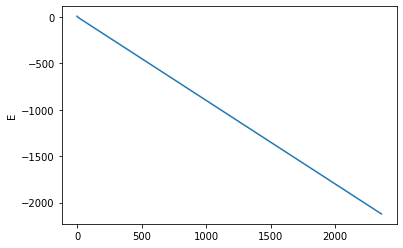

In [ ]:
flist_standard, pk, gk,k= gradient_descent(f,g, np.zeros(2), 5/4, maxIt = 100000)
print('price vector    =' , pk)
print('number of steps =', k)
print('gradient        =' , gk)
print()
plt.plot((np.array(flist_standard)))
plt.ylabel('E')
plt.show()

Here the function "coverges" to the unbounded limit until we get an overflow error because the exponentials become too large

## question 3

In [ ]:
!pip install gurobipy

     |████████████████████████████████| 11.5 MB 4.7 MB/s 


In [ ]:
import gurobipy as grb

In [ ]:
M_z_a = np.array([[-1,-1,0,0],[1,0,-1,0],[0,1,0,-1],[0,0,1,1]])

In [ ]:
q_z = np.array([-1,0,0,1])

In [ ]:
c_a = np.array([3,2,2,2])

In [ ]:
mincostflow =grb.Model()
nbz,nba = M_z_a.shape
mu_a = mincostflow.addMVar(shape=nba)
mincostflow.setObjective( mu_a @ c_a, grb.GRB.MINIMIZE)
mincostflow.addConstr(M_z_a @ mu_a == q_z)
mincostflow.optimize() 

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 4 rows, 4 columns and 8 nonzeros
Model fingerprint: 0xa1faaa6a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 4 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  4.000000000e+00
